<a href="https://colab.research.google.com/github/guilhermelaviola/MovieRatingAnalysis/blob/main/IMDbWatchlistStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-2-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


# **Basic information of the dataset**

In [3]:
# Importing the dataset and displying the last 10 rows:
imdb = pd.ExcelFile('IMDb.xlsx')
wl = pd.read_excel(imdb, 'Watchlist')
wl.tail(10)

Created                     Title Title Type  IMDb Rating  \
718 2024-06-14    The Incredible Journey      Movie          7.0   
719 2024-06-14              Blue Thunder      Movie          6.4   
720 2024-06-15                    Sahara   TV Movie          6.7   
721 2024-06-15               Rescue Dawn      Movie          7.3   
722 2024-06-19                  Derailed      Movie          6.6   
723 2024-06-20               Dinner Rush      Movie          7.2   
724 2024-06-23           Charley Varrick      Movie          7.5   
725 2024-06-25                 Leviathan      Movie          5.8   
726 2024-07-04              March or Die      Movie          6.3   
727 2024-07-06  The Strangers: Chapter 1      Movie          4.7   

     Runtime (mins)  Year                                        Genres  \
718              80  1963                      Adventure, Drama, Family   
719             109  1983                Action, Crime, Drama, Thriller   
720             106  1995                                   Action, War   
721             125  2006                     Adventure, Biography, War   
722             108  2005                        Crime, Drama, Thriller   
723              99  2000                         Crime, Drama, Romance   
724             111  1973                        Crime, Drama, Thriller   
725              98  1989  Adventure, Horror, Mystery, Sci-Fi, Thriller   
726             107  1977                Adventure, Drama, Romance, War   
727              91  2024                                        Horror   

     Num Votes         Release Date              Directors  
718       5257  1963-11-20 00:00:00        Fletcher Markle  
719      23454  1983-05-13 00:00:00            John Badham  
720       3612  1995-04-25 00:00:00  Brian Trenchard-Smith  
721     111326  2007-07-27 00:00:00          Werner Herzog  
722      76688  2005-11-11 00:00:00      Mikael HÃ¥fstrÃ¶m  
723       6082  2002-03-29 00:00:00            Bob Giraldi  
724      14280  1973-10-19 00:00:00             Don Siegel  
725      24121  1989-03-17 00:00:00     George P. Cosmatos  
726       4036  1977-10-13 00:00:00          Dick Richards  
727      13363  2024-05-17 00:00:00           Renny Harlin

In [4]:
# Displaying the number of rows and columns in the dataset:
wl.shape

(728, 10)

In [5]:
# Displaying the datatypes of each column:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Created         728 non-null    datetime64[ns]
 1   Title           728 non-null    object        
 2   Title Type      728 non-null    object        
 3   IMDb Rating     728 non-null    float64       
 4   Runtime (mins)  728 non-null    int64         
 5   Year            728 non-null    int64         
 6   Genres          728 non-null    object        
 7   Num Votes       728 non-null    int64         
 8   Release Date    728 non-null    object        
 9   Directors       724 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 57.0+ KB


In [6]:
# Displaying statistical data of the numerical data present in the dataset:
wl.describe()

Created  IMDb Rating  Runtime (mins)  \
count                            728   728.000000      728.000000   
mean   2022-08-06 22:42:51.428571392     6.651786      114.122253   
min              2020-04-29 00:00:00     0.000000       71.000000   
25%              2021-11-03 12:00:00     6.200000      100.000000   
50%              2022-06-19 12:00:00     6.600000      109.500000   
75%              2023-04-10 12:00:00     7.200000      120.250000   
max              2024-07-06 00:00:00     9.000000      317.000000   
std                              NaN     0.814026       25.015267   

              Year     Num Votes  
count   728.000000  7.280000e+02  
mean   1989.877747  8.159903e+04  
min    1927.000000  0.000000e+00  
25%    1981.000000  5.564250e+03  
50%    1992.000000  2.212950e+04  
75%    2000.000000  7.165575e+04  
max    2024.000000  2.871665e+06  
std      16.114964  2.013375e+05

# **Basic column data plotting**

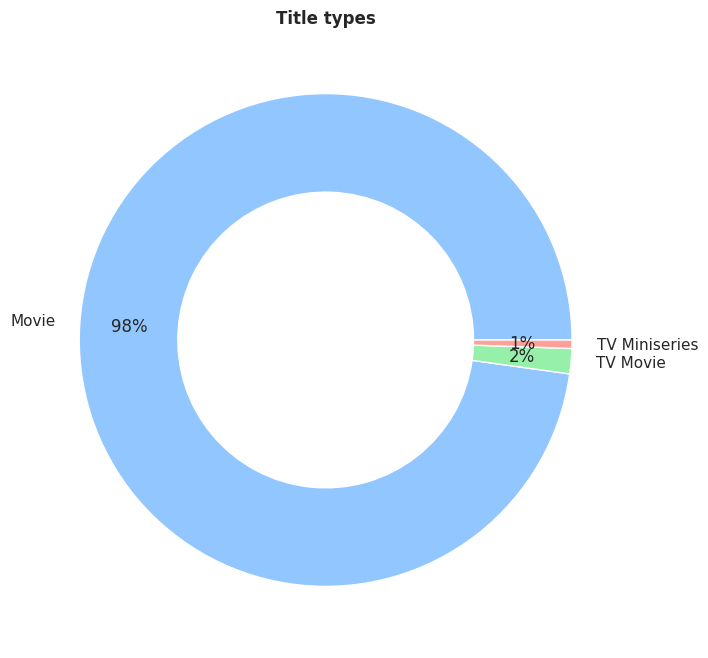

In [7]:
# Displaying the title types present in the dataset:
wl['Title Type'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

In [8]:
# Creating a datetime object based on the dates from the dataset:
wl['Created'] = wl['Created'].map(pd.to_datetime)
wl['Day Created'] = wl['Created'].apply(lambda x : x.day)
wl['Month Created'] = wl['Created'].apply(lambda x : x.month)
wl['Year Created'] = wl['Created'].apply(lambda x : x.year)
wl['Weekday Created'] = wl['Created'].apply(lambda x : x.weekday())

# Displaying the datatypes of each column:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Created          728 non-null    datetime64[ns]
 1   Title            728 non-null    object        
 2   Title Type       728 non-null    object        
 3   IMDb Rating      728 non-null    float64       
 4   Runtime (mins)   728 non-null    int64         
 5   Year             728 non-null    int64         
 6   Genres           728 non-null    object        
 7   Num Votes        728 non-null    int64         
 8   Release Date     728 non-null    object        
 9   Directors        724 non-null    object        
 10  Day Created      728 non-null    int64         
 11  Month Created    728 non-null    int64         
 12  Year Created     728 non-null    int64         
 13  Weekday Created  728 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7)

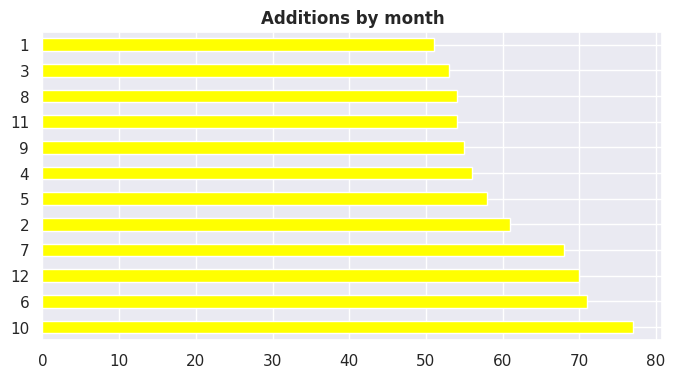

In [9]:
# Displaying the months with most and less additions:
wl['Month Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by month', fontweight = 'bold')
plt.show()

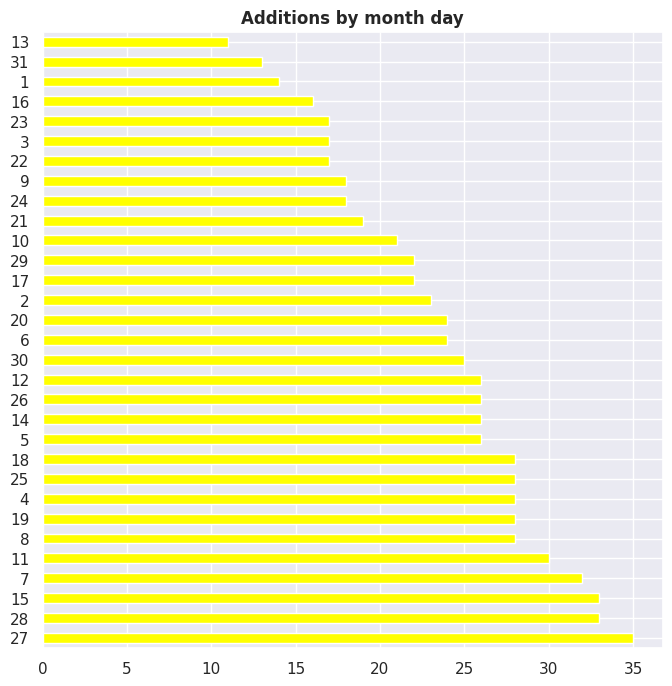

In [10]:
# Displaying the month days with most and less additions:
wl['Day Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Additions by month day', fontweight = 'bold')
plt.show()

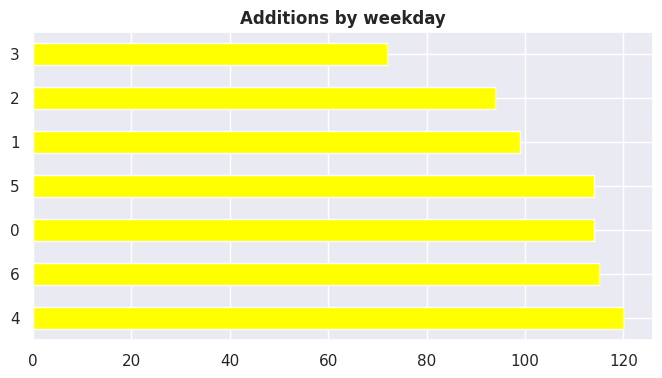

In [11]:
# Displaying the weekdays with most and less additions:
wl['Weekday Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by weekday', fontweight = 'bold')
plt.show()

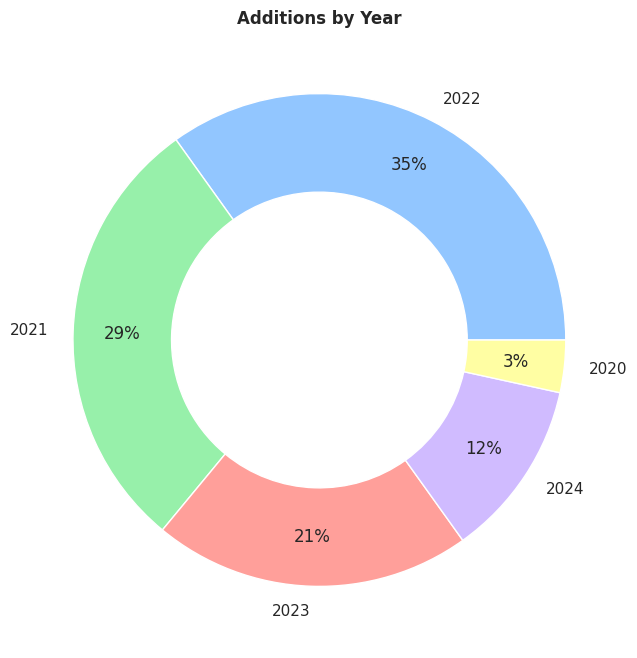

In [12]:
# Displaying the years with most and less additions:
wl['Year Created'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Additions by Year', fontweight = 'bold')
plt.show()

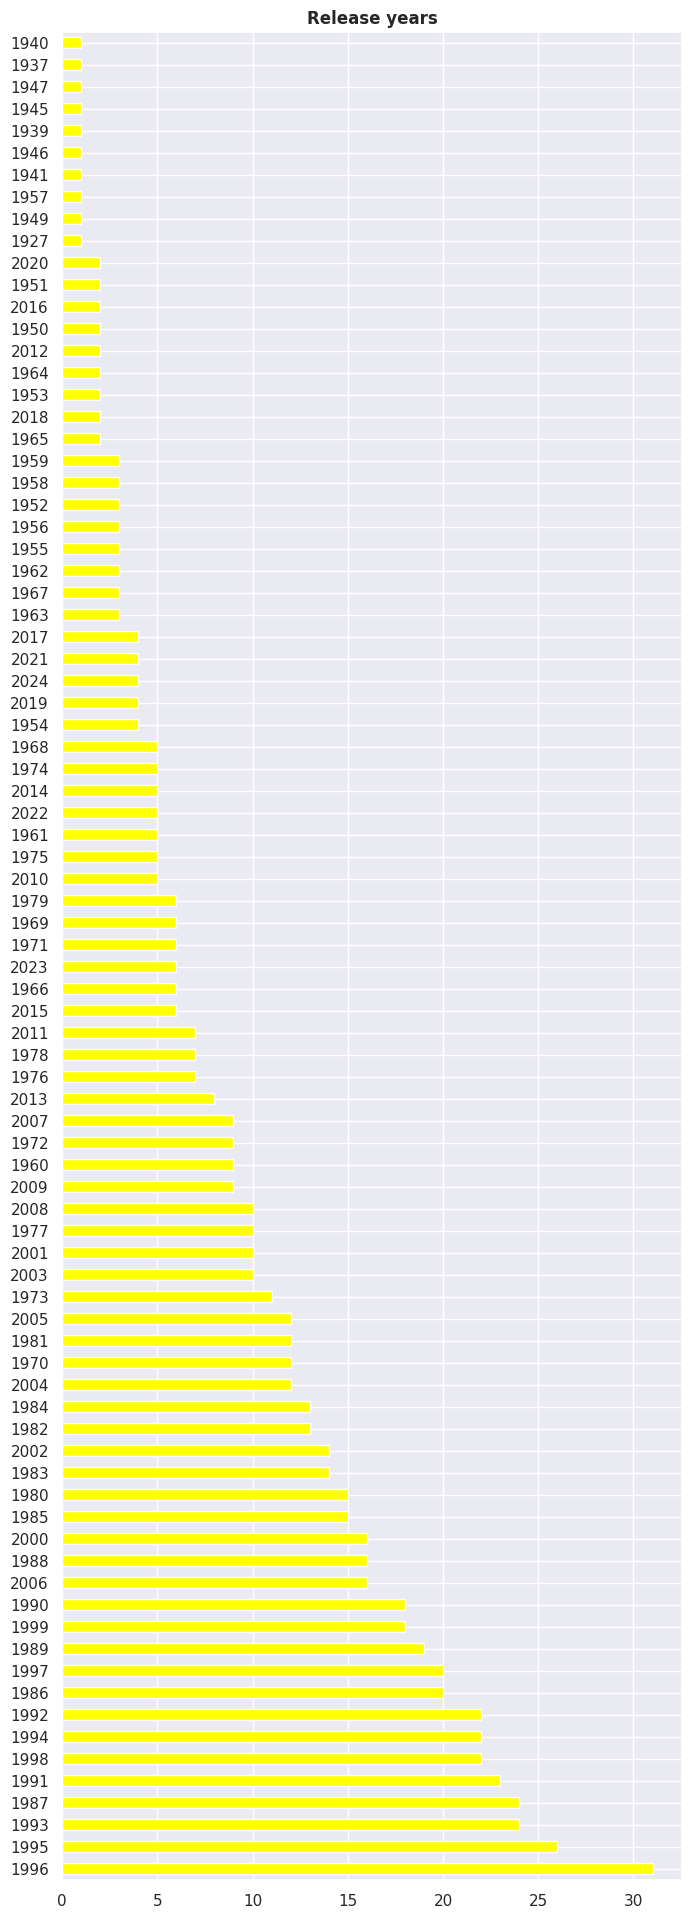

In [13]:
# Displaying distibution of release years in the dataset:
wl['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 24))
plt.ylabel(None)
plt.title('Release years', fontweight = 'bold')
plt.show()

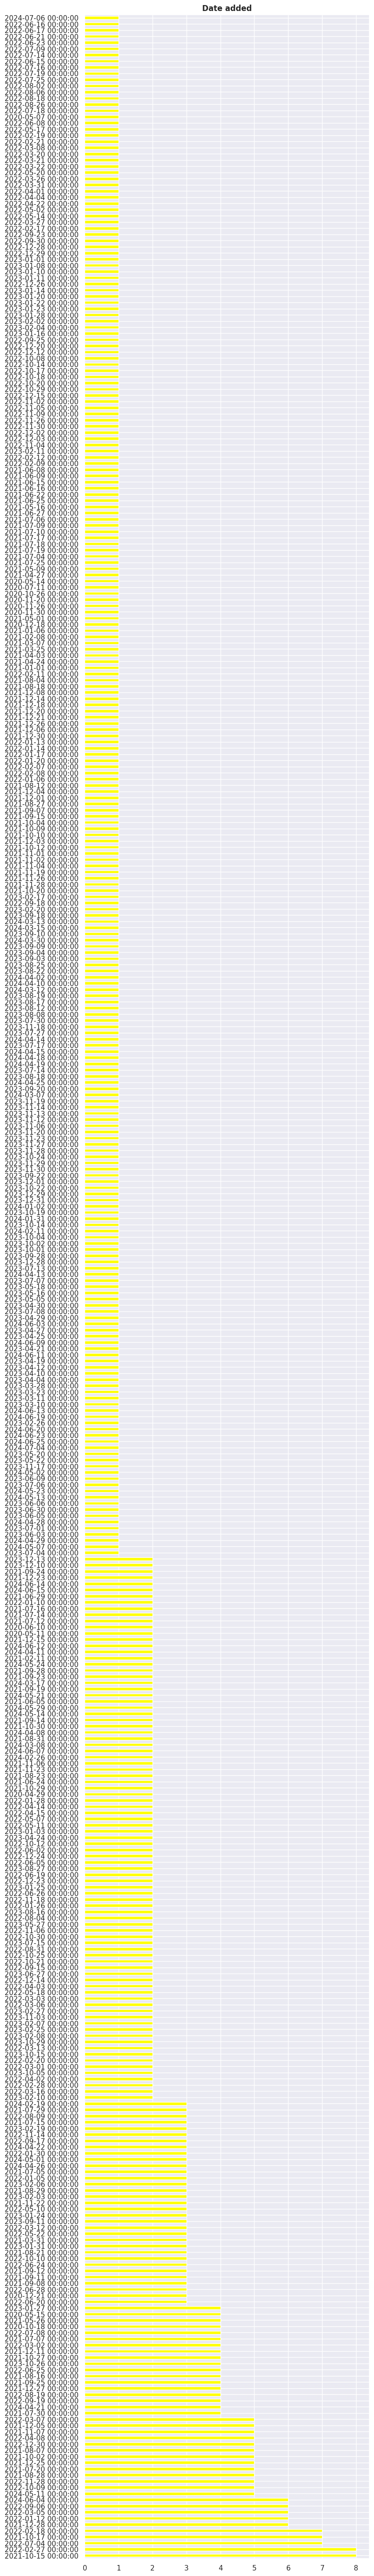

In [14]:
# Displaying distibution of dates added in the dataset:
wl['Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 72))
plt.ylabel(None)
plt.title('Date added', fontweight = 'bold')
plt.show()

# **Applying functions to combine data from more than one column to generate new columns with analytics**

In [15]:
# Classifying the movies by decade they were release in:
def movies_by_decade(year):
  if year >= 1900 and year < 1910:
    result = '1900s'
  elif year >= 1910 and year < 1920:
    result = '1910s'
  elif year >= 1920 and year < 1930:
    result = '1920s'
  elif year >= 1930 and year < 1940:
    result = '1930s'
  elif year >= 1940 and year < 1950:
    result = '1940s'
  elif year >= 1950 and year < 1960:
    result = '1950s'
  elif year >= 1960 and year < 1970:
    result = '1960s'
  elif year >= 1970 and year < 1980:
    result = '1970s'
  elif year >= 1980 and year < 1990:
    result = '1980s'
  elif year >= 1990 and year < 2000:
    result = '1990s'
  elif year >= 2000 and year < 2010:
    result = '2000s'
  elif year >= 2010 and year < 2020:
    result = '2010s'
  elif year >= 2020 and year < 2030:
    result = '2020s'
  else:
    result = 'Unknown'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Decade'] = wl['Year'].apply(movies_by_decade)
wl.head()

Created                                           Title Title Type  \
0 2020-04-29                              The Great Dictator      Movie   
1 2020-04-29                                         Vertigo      Movie   
2 2020-05-07  Sweeney Todd: The Demon Barber of Fleet Street      Movie   
3 2020-05-11                                         Flipper      Movie   
4 2020-05-11                                          Alaska      Movie   

   IMDb Rating  Runtime (mins)  Year                            Genres  \
0          8.4             125  1940                Comedy, Drama, War   
1          8.3             128  1958        Mystery, Romance, Thriller   
2          7.3             116  2007  Drama, Horror, Musical, Thriller   
3          5.3              95  1996   Adventure, Crime, Drama, Family   
4          5.7             109  1996          Adventure, Drama, Family   

   Num Votes         Release Date         Directors  Day Created  \
0     237408  1940-10-15 00:00:00   Charles Chaplin           29   
1     427044  1958-05-09 00:00:00  Alfred Hitchcock           29   
2     386979  2007-12-03 00:00:00        Tim Burton            7   
3      11667  1996-05-17 00:00:00      Alan Shapiro           11   
4       5818  1996-08-14 00:00:00  Fraser C. Heston           11   

   Month Created  Year Created  Weekday Created Decade  
0              4          2020                2  1940s  
1              4          2020                2  1950s  
2              5          2020                3  2000s  
3              5          2020                0  1990s  
4              5          2020                0  1990s

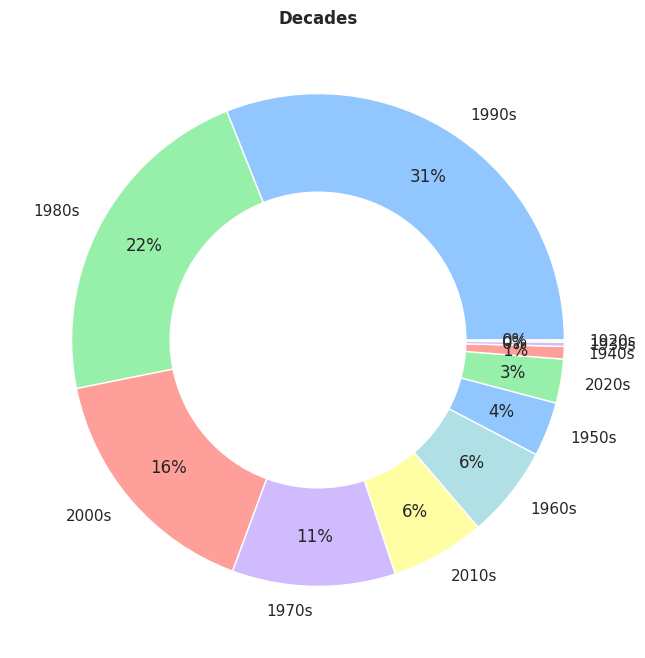

In [16]:
# Displaying the decades the movies are from:
wl['Decade'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Decades', fontweight = 'bold')
plt.show()

In [17]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Regular'
  elif rating >= 4 and rating < 5:
    quality = 'Bad'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Quality'] = wl['IMDb Rating'].apply(imdb_rating)
wl.head()

Created                                           Title Title Type  \
0 2020-04-29                              The Great Dictator      Movie   
1 2020-04-29                                         Vertigo      Movie   
2 2020-05-07  Sweeney Todd: The Demon Barber of Fleet Street      Movie   
3 2020-05-11                                         Flipper      Movie   
4 2020-05-11                                          Alaska      Movie   

   IMDb Rating  Runtime (mins)  Year                            Genres  \
0          8.4             125  1940                Comedy, Drama, War   
1          8.3             128  1958        Mystery, Romance, Thriller   
2          7.3             116  2007  Drama, Horror, Musical, Thriller   
3          5.3              95  1996   Adventure, Crime, Drama, Family   
4          5.7             109  1996          Adventure, Drama, Family   

   Num Votes         Release Date         Directors  Day Created  \
0     237408  1940-10-15 00:00:00   Charles Chaplin           29   
1     427044  1958-05-09 00:00:00  Alfred Hitchcock           29   
2     386979  2007-12-03 00:00:00        Tim Burton            7   
3      11667  1996-05-17 00:00:00      Alan Shapiro           11   
4       5818  1996-08-14 00:00:00  Fraser C. Heston           11   

   Month Created  Year Created  Weekday Created Decade  Quality  
0              4          2020                2  1940s  Amazing  
1              4          2020                2  1950s  Amazing  
2              5          2020                3  2000s     Good  
3              5          2020                0  1990s  Regular  
4              5          2020                0  1990s  Regular

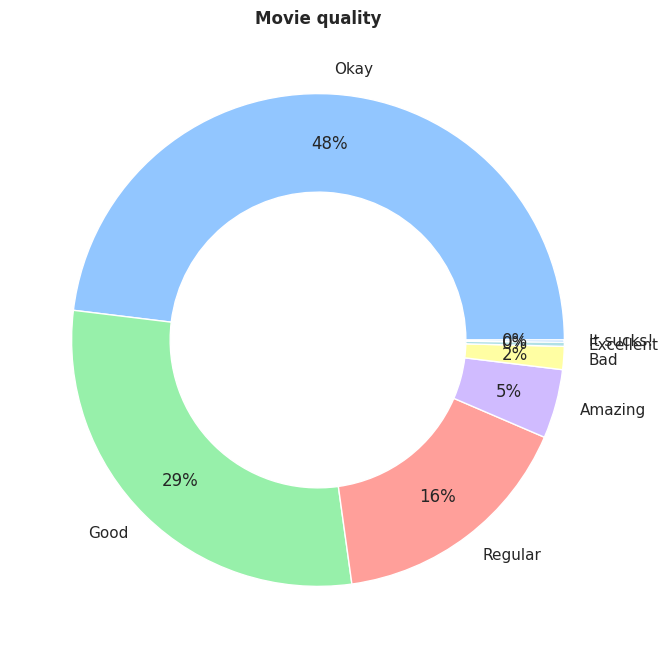

In [18]:
# Displaying the movie rating classification based on the algorithm above:
wl['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [19]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes > 2000000:
    popularity = 'Over 2M votes'
  elif num_votes > 1000000 and num_votes <= 2000000:
    popularity = 'Over 1M votes'
  elif num_votes > 500000 and num_votes <= 1000000:
    popularity = 'Over 500k votes'
  elif num_votes > 250000 and num_votes <= 500000:
    popularity = 'Over 250k votes'
  else:
    popularity = 'Less than 250k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Movie popularity'] = wl['Num Votes'].apply(movie_popularity)
wl.head()

Created                                           Title Title Type  \
0 2020-04-29                              The Great Dictator      Movie   
1 2020-04-29                                         Vertigo      Movie   
2 2020-05-07  Sweeney Todd: The Demon Barber of Fleet Street      Movie   
3 2020-05-11                                         Flipper      Movie   
4 2020-05-11                                          Alaska      Movie   

   IMDb Rating  Runtime (mins)  Year                            Genres  \
0          8.4             125  1940                Comedy, Drama, War   
1          8.3             128  1958        Mystery, Romance, Thriller   
2          7.3             116  2007  Drama, Horror, Musical, Thriller   
3          5.3              95  1996   Adventure, Crime, Drama, Family   
4          5.7             109  1996          Adventure, Drama, Family   

   Num Votes         Release Date         Directors  Day Created  \
0     237408  1940-10-15 00:00:00   Charles Chaplin           29   
1     427044  1958-05-09 00:00:00  Alfred Hitchcock           29   
2     386979  2007-12-03 00:00:00        Tim Burton            7   
3      11667  1996-05-17 00:00:00      Alan Shapiro           11   
4       5818  1996-08-14 00:00:00  Fraser C. Heston           11   

   Month Created  Year Created  Weekday Created Decade  Quality  \
0              4          2020                2  1940s  Amazing   
1              4          2020                2  1950s  Amazing   
2              5          2020                3  2000s     Good   
3              5          2020                0  1990s  Regular   
4              5          2020                0  1990s  Regular   

       Movie popularity  
0  Less than 250k votes  
1       Over 250k votes  
2       Over 250k votes  
3  Less than 250k votes  
4  Less than 250k votes

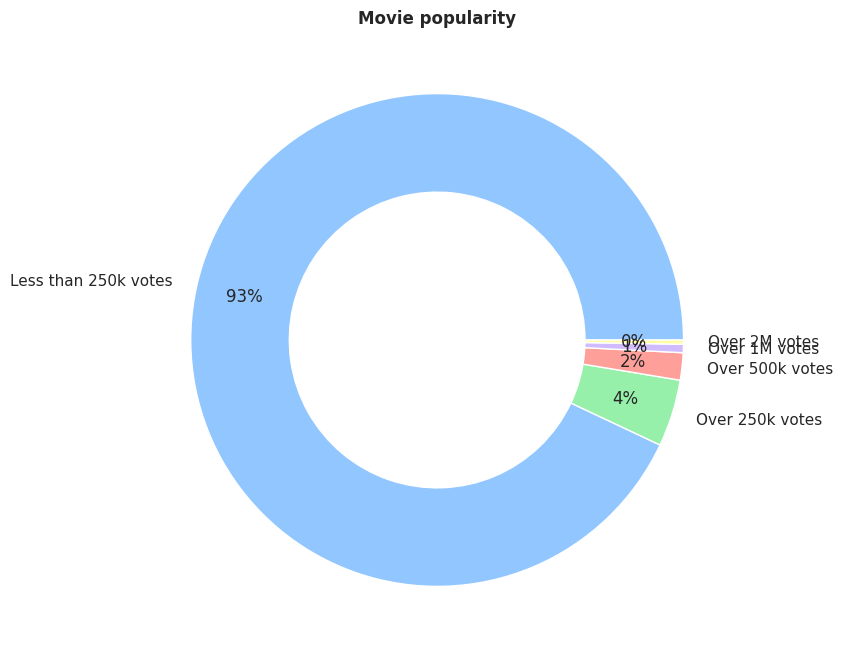

In [20]:
# Displaying the movie popularity based on the algorithm above:
wl['Movie popularity'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [21]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Movie duration'] = wl['Runtime (mins)'].apply(movie_duration)
wl.head()

Created                                           Title Title Type  \
0 2020-04-29                              The Great Dictator      Movie   
1 2020-04-29                                         Vertigo      Movie   
2 2020-05-07  Sweeney Todd: The Demon Barber of Fleet Street      Movie   
3 2020-05-11                                         Flipper      Movie   
4 2020-05-11                                          Alaska      Movie   

   IMDb Rating  Runtime (mins)  Year                            Genres  \
0          8.4             125  1940                Comedy, Drama, War   
1          8.3             128  1958        Mystery, Romance, Thriller   
2          7.3             116  2007  Drama, Horror, Musical, Thriller   
3          5.3              95  1996   Adventure, Crime, Drama, Family   
4          5.7             109  1996          Adventure, Drama, Family   

   Num Votes         Release Date         Directors  Day Created  \
0     237408  1940-10-15 00:00:00   Charles Chaplin           29   
1     427044  1958-05-09 00:00:00  Alfred Hitchcock           29   
2     386979  2007-12-03 00:00:00        Tim Burton            7   
3      11667  1996-05-17 00:00:00      Alan Shapiro           11   
4       5818  1996-08-14 00:00:00  Fraser C. Heston           11   

   Month Created  Year Created  Weekday Created Decade  Quality  \
0              4          2020                2  1940s  Amazing   
1              4          2020                2  1950s  Amazing   
2              5          2020                3  2000s     Good   
3              5          2020                0  1990s  Regular   
4              5          2020                0  1990s  Regular   

       Movie popularity         Movie duration  
0  Less than 250k votes    Between 2h and 2h29  
1       Over 250k votes    Between 2h and 2h29  
2       Over 250k votes  Between 1h40 and 1h59  
3  Less than 250k votes  Between 1h30 and 1h39  
4  Less than 250k votes  Between 1h40 and 1h59

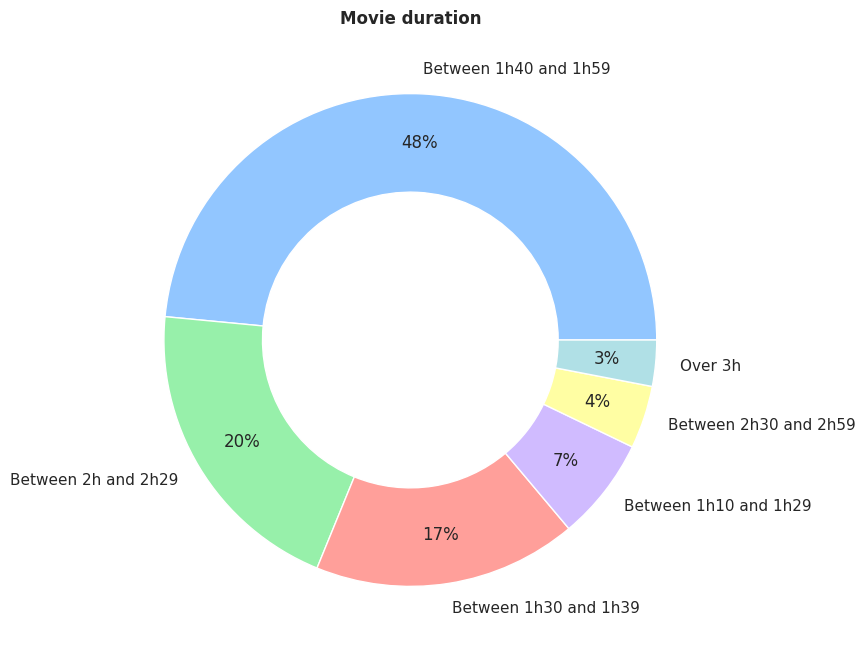

In [22]:
# Displaying the movie duration based on the algorithm above:
wl['Movie duration'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [23]:
# Classifying the movies by year quartile added based on the month they were added to the dataset:
def year_quartile(month):
  if month >= 1 and month <= 3:
    quartile = 'First'
  elif month >= 4 and month <= 6:
    quartile = 'Second'
  elif month >= 7 and month <= 9:
    quartile = 'Third'
  else:
    quartile = 'Fourth'
  return quartile

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Quartile Added'] = wl['Month Created'].apply(year_quartile)
wl.head()

Created                                           Title Title Type  \
0 2020-04-29                              The Great Dictator      Movie   
1 2020-04-29                                         Vertigo      Movie   
2 2020-05-07  Sweeney Todd: The Demon Barber of Fleet Street      Movie   
3 2020-05-11                                         Flipper      Movie   
4 2020-05-11                                          Alaska      Movie   

   IMDb Rating  Runtime (mins)  Year                            Genres  \
0          8.4             125  1940                Comedy, Drama, War   
1          8.3             128  1958        Mystery, Romance, Thriller   
2          7.3             116  2007  Drama, Horror, Musical, Thriller   
3          5.3              95  1996   Adventure, Crime, Drama, Family   
4          5.7             109  1996          Adventure, Drama, Family   

   Num Votes         Release Date         Directors  Day Created  \
0     237408  1940-10-15 00:00:00   Charles Chaplin           29   
1     427044  1958-05-09 00:00:00  Alfred Hitchcock           29   
2     386979  2007-12-03 00:00:00        Tim Burton            7   
3      11667  1996-05-17 00:00:00      Alan Shapiro           11   
4       5818  1996-08-14 00:00:00  Fraser C. Heston           11   

   Month Created  Year Created  Weekday Created Decade  Quality  \
0              4          2020                2  1940s  Amazing   
1              4          2020                2  1950s  Amazing   
2              5          2020                3  2000s     Good   
3              5          2020                0  1990s  Regular   
4              5          2020                0  1990s  Regular   

       Movie popularity         Movie duration Quartile Added  
0  Less than 250k votes    Between 2h and 2h29         Second  
1       Over 250k votes    Between 2h and 2h29         Second  
2       Over 250k votes  Between 1h40 and 1h59         Second  
3  Less than 250k votes  Between 1h30 and 1h39         Second  
4  Less than 250k votes  Between 1h40 and 1h59         Second

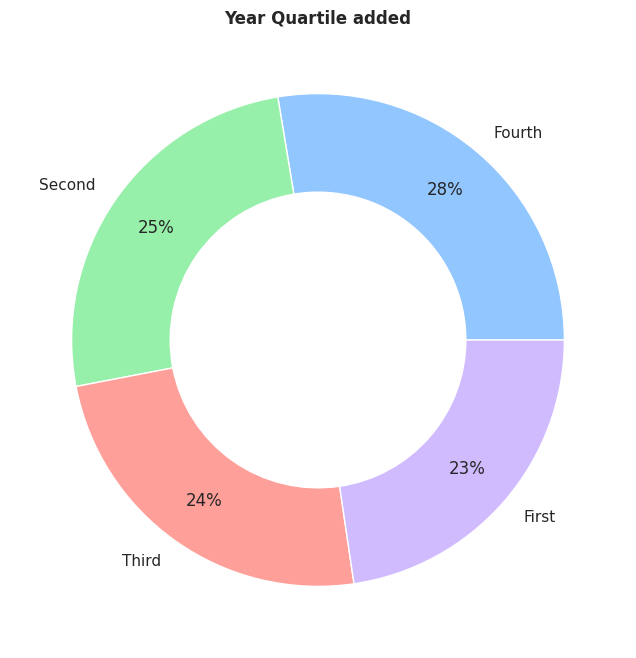

In [24]:
# Displaying the quartile the movie was added based on the algorithm above:
wl['Quartile Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year Quartile added', fontweight = 'bold')
plt.show()

In [25]:
# Classifying the movies by the month half added based on the day they were added to the dataset:
def month_half(day):
  if day >= 1 and day <= 15:
    half = 'First'
  else:
    half = 'Second'
  return half

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Month Half Added'] = wl['Day Created'].apply(month_half)
wl.head()

Created                                           Title Title Type  \
0 2020-04-29                              The Great Dictator      Movie   
1 2020-04-29                                         Vertigo      Movie   
2 2020-05-07  Sweeney Todd: The Demon Barber of Fleet Street      Movie   
3 2020-05-11                                         Flipper      Movie   
4 2020-05-11                                          Alaska      Movie   

   IMDb Rating  Runtime (mins)  Year                            Genres  \
0          8.4             125  1940                Comedy, Drama, War   
1          8.3             128  1958        Mystery, Romance, Thriller   
2          7.3             116  2007  Drama, Horror, Musical, Thriller   
3          5.3              95  1996   Adventure, Crime, Drama, Family   
4          5.7             109  1996          Adventure, Drama, Family   

   Num Votes         Release Date         Directors  Day Created  \
0     237408  1940-10-15 00:00:00   Charles Chaplin           29   
1     427044  1958-05-09 00:00:00  Alfred Hitchcock           29   
2     386979  2007-12-03 00:00:00        Tim Burton            7   
3      11667  1996-05-17 00:00:00      Alan Shapiro           11   
4       5818  1996-08-14 00:00:00  Fraser C. Heston           11   

   Month Created  Year Created  Weekday Created Decade  Quality  \
0              4          2020                2  1940s  Amazing   
1              4          2020                2  1950s  Amazing   
2              5          2020                3  2000s     Good   
3              5          2020                0  1990s  Regular   
4              5          2020                0  1990s  Regular   

       Movie popularity         Movie duration Quartile Added Month Half Added  
0  Less than 250k votes    Between 2h and 2h29         Second           Second  
1       Over 250k votes    Between 2h and 2h29         Second           Second  
2       Over 250k votes  Between 1h40 and 1h59         Second            First  
3  Less than 250k votes  Between 1h30 and 1h39         Second            First  
4  Less than 250k votes  Between 1h40 and 1h59         Second            First

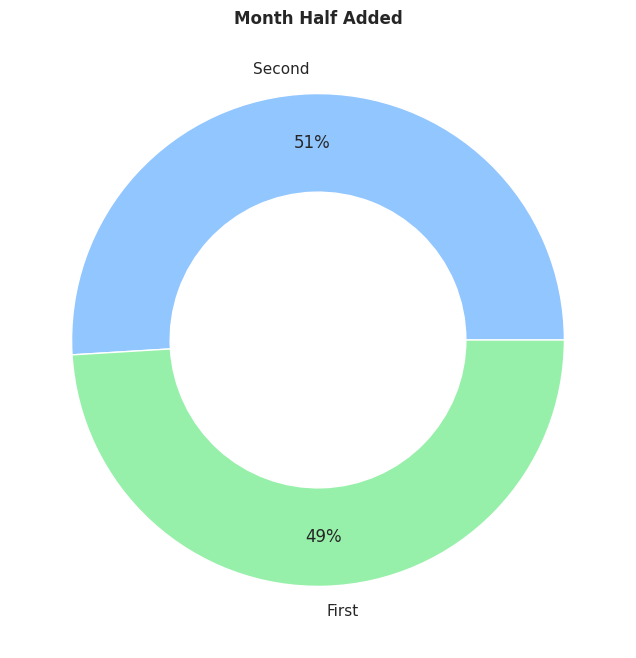

In [26]:
# Displaying the month half the movie was added based on the algorithm above:
wl['Month Half Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Month Half Added', fontweight = 'bold')
plt.show()

# **The algorithm below was a bit more complicated to be implemented, as the movie genres are listed in the column separated by comma, so they had to be splitted and counted, and then their proportions were counted and plotted.**

In [27]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

# Splitting the genres by comma and removing leading spaces:
wl['Genres'] = wl['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
wl = wl.explode('Genres')

# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = wl.index, columns = wl['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [28]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action         608   120
Adventure      610   118
Animation      710    18
Biography      657    71
Comedy         490   238
Crime          585   143
Documentary    722     6
Drama          211   517
Family         652    76
Fantasy        669    59
Film-Noir      724     4
History        686    42
Horror         703    25
Music          700    28
Musical        704    24
Mystery        676    52
Romance        547   181
Sci-Fi         672    56
Sport          681    47
Thriller       583   145
War            675    53
Western        702    26


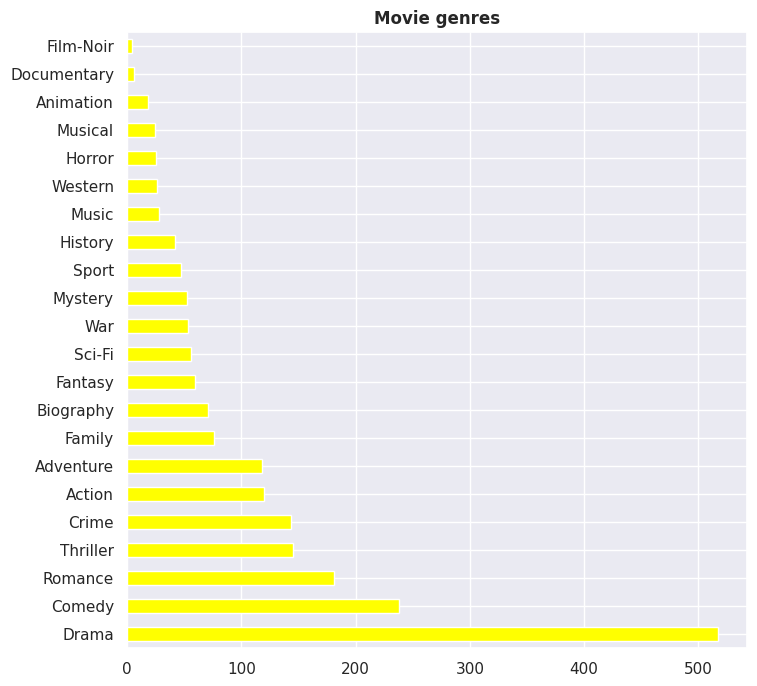

In [29]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()

In [30]:
wl = wl[wl['Directors'].apply(lambda x: isinstance(x, str))]

# Splitting the directors by comma and removing leading spaces:
wl['Directors'] = wl['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
wl = wl.explode('Directors')

# Counting Matrix using crosstab method:
directors_counts = pd.crosstab(index = wl.index, columns = wl['Directors'], margins = False).to_dict('index')
directors_counts = pd.DataFrame(directors_counts)

# Counting the number of 0s and 1s in each row:
final_directors_counts = (directors_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

<ipython-input-30-96bf50eac1cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wl['Directors'] = wl['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])


In [31]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
final_directors_counts = pd.DataFrame(final_directors_counts.tolist(), index = final_directors_counts.index, columns = ['False', 'True'])
print(final_directors_counts)

                     False  True
Adrian Lyne            722     0
Alan Parker            723     0
Alan Shapiro           723     0
Albert Band            723     0
Albert Brooks          723     0
...                    ...   ...
William Wyler          723     0
Wolfgang Petersen      723     0
Wolfgang Reitherman    721     0
Yves Simoneau          723     0
Zoltan Korda           723     1

[567 rows x 2 columns]


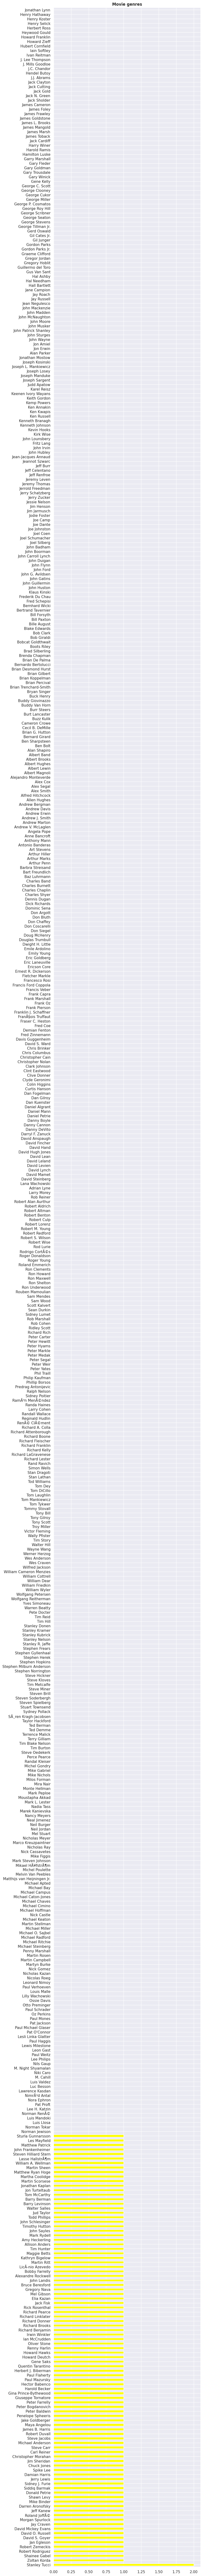

In [32]:
# Displaying the proportions of the directors present in the dataset:
final_directors_counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 140))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()